In [1]:
#Required Packages#
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.api import ARMA as arma
from datetime import datetime
from numpy import round
from numpy import nan
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA as arima
from statsmodels.tsa.arima_model import ARIMAResults as arima_results
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Zillow Dataset#
ZillowCSV="https://files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv"
Zillow=pd.read_csv(ZillowCSV, engine='python' )

In [3]:
print(Zillow.info())
print(Zillow.shape)
print(Zillow)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30464 entries, 0 to 30463
Columns: 300 entries, RegionID to 2020-03-31
dtypes: float64(291), int64(3), object(6)
memory usage: 69.7+ MB
None
(30464, 300)
       RegionID  SizeRank  RegionName RegionType StateName State  \
0         61639         0       10025        Zip        NY    NY   
1         84654         1       60657        Zip        IL    IL   
2         61637         2       10023        Zip        NY    NY   
3         91982         3       77494        Zip        TX    TX   
4         84616         4       60614        Zip        IL    IL   
...         ...       ...         ...        ...       ...   ...   
30459     58111     35187         802        Zip        UT    UT   
30460     58115     35187         820        Zip        LA    LA   
30461     58117     35187         822        Zip        LA    LA   
30462     58121     35187         831        Zip        AL    AL   
30463     58125     35187         851        Zip

In [4]:
Zillow.isnull().sum()

RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     0
             ..
2019-11-30    0
2019-12-31    0
2020-01-31    0
2020-02-29    0
2020-03-31    0
Length: 300, dtype: int64

In [5]:
Zillow.dropna(axis=0, how='any', inplace=True)
Zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12033 entries, 1 to 30447
Columns: 300 entries, RegionID to 2020-03-31
dtypes: float64(291), int64(3), object(6)
memory usage: 27.6+ MB


In [9]:
#Create a Subset of Arkansas#
Arkansas= Zillow[Zillow['State']=='AR']

In [10]:
Search=['Hot Springs','Little Rock','Fayetteville','Searcy']
MetroArkansas= Arkansas[Arkansas['Metro'].str.contains('|'.join(Search))]
print(MetroArkansas)

       RegionID  SizeRank  RegionName RegionType StateName State  \
331       89249       332       71913        Zip        AR    AR   
663       89319       664       72034        Zip        AR    AR   
868       89707       870       72701        Zip        AR    AR   
913       89749       916       72764        Zip        AR    AR   
1584      89745      1592       72758        Zip        AR    AR   
...         ...       ...         ...        ...       ...   ...   
24411     89348     25877       72068        Zip        AR    AR   
25702     89732     27426       72739        Zip        AR    AR   
25957     89289     27759       72001        Zip        AR    AR   
27411     89432     29594       72181        Zip        AR    AR   
28229     89405     30679       72139        Zip        AR    AR   

               City                                 Metro         CountyName  \
331     Hot Springs                           Hot Springs     Garland County   
663          Conway  Li

In [8]:
#Split Arkansas Locations#
HotSprings=MetroArkansas[MetroArkansas['Metro'].str.contains('Hot Springs')]
LittleRock=MetroArkansas[MetroArkansas['Metro'].str.contains('Little Rock')]
Fayetteville=MetroArkansas[MetroArkansas['Metro'].str.contains('Fayetteville')]
Searcy=MetroArkansas[MetroArkansas['Metro'].str.contains('Searcy')]

In [11]:
#Means for each area#
MeanHotSprings=HotSprings.iloc[:, 6:].mean(axis=0)
MeanHotSprings.index=pd.to_datetime(MeanHotSprings.index)
MeanLittleRock=LittleRock.iloc[:, 6:].mean(axis=0)
MeanLittleRock.index=pd.to_datetime(MeanLittleRock.index)
MeanFayetteville=Fayetteville.iloc[:, 6:].mean(axis=0)
MeanFayetteville.index=pd.to_datetime(MeanFayetteville.index)
MeanSearcy=Searcy.iloc[:, 6:].mean(axis=0)
MeanSearcy.index=pd.to_datetime(MeanSearcy.index)

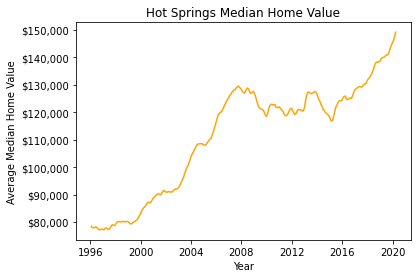

In [22]:
#Time Series: Hot Springs#
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
fig, ax = plt.subplots()
plt.plot(MeanHotSprings.index,MeanHotSprings.values, color='orange')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xlabel('Year')
plt.xticks() 
plt.ylabel('Average Median Home Value')
plt.title('Hot Springs Median Home Value')
plt.show()

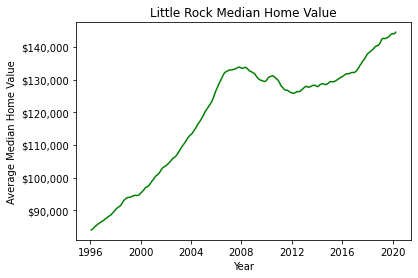

In [23]:
#Time Series: Little Rock#
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
fig, ax = plt.subplots()
plt.plot(MeanLittleRock.index,MeanLittleRock.values,color='green')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xlabel('Year')
plt.xticks() 
plt.ylabel('Average Median Home Value')
plt.title('Little Rock Median Home Value')
plt.show()

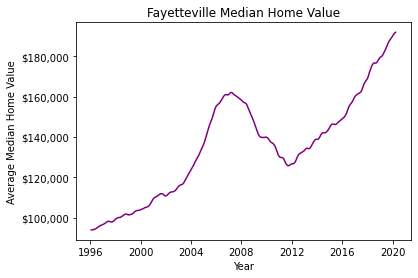

In [24]:
#Time Series: Fayettesville#
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
fig, ax = plt.subplots()
plt.plot(MeanFayetteville.index,MeanFayetteville.values,color='purple')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xlabel('Year')
plt.xticks() 
plt.ylabel('Average Median Home Value')
plt.title('Fayetteville Median Home Value')
plt.show()

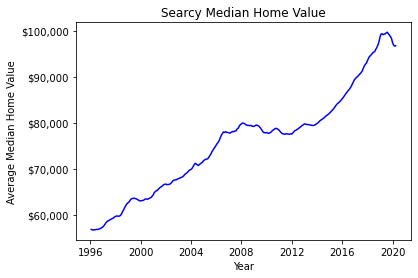

In [25]:
#Time Series: Searcy#
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
fig, ax = plt.subplots()
plt.plot(MeanSearcy.index,MeanSearcy.values,color='blue')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xlabel('Year')
plt.xticks() 
plt.ylabel('Average Median Home Value')
plt.title('Searcy Median Home Value')
plt.show()

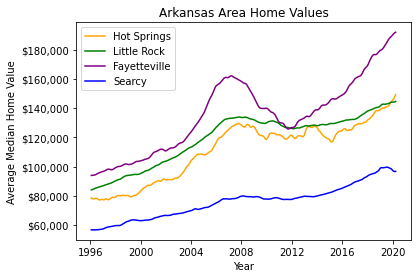

In [26]:
#Time Series: All Locations#
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
fig, ax = plt.subplots()
plt.plot(MeanHotSprings.index,MeanHotSprings.values, color='orange', label = 'Hot Springs')
plt.plot(MeanLittleRock.index,MeanLittleRock.values,color='green', label = 'Little Rock')
plt.plot(MeanFayetteville.index,MeanFayetteville.values,color='purple', label = 'Fayetteville')
plt.plot(MeanSearcy.index,MeanSearcy.values,color='blue', label = 'Searcy')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xlabel('Year')
plt.xticks() 
plt.ylabel('Average Median Home Value')
plt.title('Arkansas Area Home Values')
plt.legend()
plt.show()

In [17]:
ZillowTrain = Zillow.loc[:, '1996-04-30':'2017-12-31']
ZillowTrain.columns = pd.to_datetime(ZillowTrain.columns)

ZillowTest18 = Zillow.loc[:, '2018-01-31':'2018-12-31']
ZillowTest18.columns = pd.to_datetime(ZillowTest18.columns)

ZillowPrediction18 = pd.DataFrame(index=ZillowTest18.index, columns=ZillowTest18.columns)
ZillowPrediction18.fillna(nan, inplace=True)

columns = ['2020-1','2020-2','2020-3','2020-4','2020-5','2020-6','2020-7',
           '2020-8','2020-9','2020-10','2020-11','2020-12']
ZillowPrediction20 = pd.DataFrame(index=ZillowTest18.index, columns=columns)

In [18]:
MeanZillow = ZillowTrain.mean(axis=0)

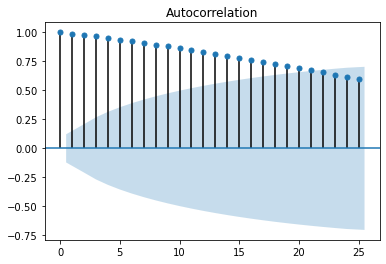

In [19]:
plot_acf(MeanZillow)
pyplot.show()

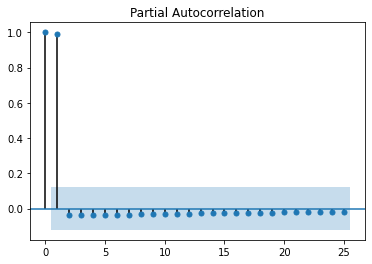

In [20]:
plot_pacf(MeanZillow)
pyplot.show()

In [27]:
#ARIMA Model# 
for i in ZillowTrain.index:
    zillowTrainSeries = ZillowTrain.loc[i]
    try:
        model=arima(zillowTrainSeries, order=(2,0,0))
        model_fit = model.fit()
    except:
        pass
    else:
        ZillowPrediction18.loc[i] = model_fit.predict(start='2018-01', end='2018-12').apply(lambda x:round(x,1))
ZillowPrediction18.dropna(axis=0, how='any', inplace=True)

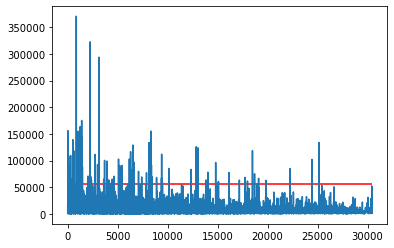

In [29]:
Rmse = pd.DataFrame(index=ZillowPrediction18.index, columns=['RMSE'])
Rmse.fillna(nan, inplace=True)

for i in ZillowPrediction18.index:
  Rmse.loc[i] = round(sqrt(mean_squared_error(ZillowTest18.loc[i], ZillowPrediction18.loc[i])), 1)

plt.plot(Rmse.index, Rmse.values)
plt.hlines(round(0.15*Rmse.loc[:, 'RMSE'].max(), 1), xmin=0, xmax=Rmse.index.max(), color='red')
plt.show()

In [33]:
Growth = pd.DataFrame(index=ZillowPrediction18.index, columns=['growth', 'ZipCode', 'City'])
for i in ZillowPrediction20.index:
  prediction = round(ZillowPrediction20.loc[i].mean(), 1)
  current = round(ZillowTest18.loc[i].mean(), 1)
  Growth.loc[i, 'growth'] = round(abs(prediction - current) / current * 100, 1)
  Growth.loc[i, 'ZipCode'] = Zillow.loc[i, 'RegionID']
  Growth.loc[i, 'City'] = Zillow.loc[i, 'City']

Growth.sort_values('growth', ascending=False).iloc[0:8]

,growth,ZipCode,City
1,NaN,84654,Chicago
3,NaN,91982,Katy
4,NaN,84616,Chicago
5,NaN,91940,Katy
7,NaN,91733,Houston
8,NaN,93144,El Paso
9,NaN,84640,Chicago
10,NaN,62037,New York
